In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
#Loading original dataset
data = pd.read_csv('mushrooms.csv')
label_encoder = LabelEncoder()
df = data.apply(label_encoder.fit_transform)
df = data[["odor", "stalk-root", "veil-color","bruises","stalk-surface-above-ring",
          "stalk-color-below-ring","ring-number","spore-print-color","gill-color"]]


In [3]:
df

,odor,stalk-root,veil-color,bruises,stalk-surface-above-ring,stalk-color-below-ring,ring-number,spore-print-color,gill-color
0,p,e,w,t,s,w,o,k,k
1,a,c,w,t,s,w,o,n,k
2,l,c,w,t,s,w,o,n,n
3,p,e,w,t,s,w,o,k,n
4,n,e,w,f,s,w,o,n,k
...,...,...,...,...,...,...,...,...,...
8119,n,?,o,f,s,o,o,b,y
8120,n,?,n,f,s,o,o,b,y
8121,n,?,o,f,s,o,o,b,n
8122,y,?,w,f,s,w,o,w,b


In [4]:
#Loading generated dataset
df2 = pd.read_csv('mushrooms2.csv')
#df2['arrival_date_month'] = LabelEncoder().fit_transform(df2['arrival_date_month'])
df2

,odor,stalk-root,veil-color,bruises,stalk-surface-above-ring,stalk-color-below-ring,ring-number,spore-print-color,gill-color,class
0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,p
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,e
2,4.0,1.0,2.0,0.0,0.0,0.0,1.0,6.0,4.0,e
3,5.0,1.0,2.0,0.0,0.0,0.0,1.0,6.0,4.0,e
4,6.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,4.0,e
...,...,...,...,...,...,...,...,...,...,...
9995,2.0,0.0,0.0,50.0,50.0,48.0,45.0,2.0,2.0,p
9996,2.0,0.0,0.0,50.0,50.0,48.0,45.0,2.0,1.0,p
9997,2.0,0.0,0.0,50.0,50.0,48.0,45.0,1.0,1.0,p
9998,2.0,0.0,0.0,50.0,50.0,48.0,45.0,1.0,2.0,p


In [56]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df)
df2['is_inlier_IF'] = iso_forest.predict(df2)

In [57]:
inliers_IF = df2[df2['is_inlier_IF'] == 1]
outliers_IF = df2[df2['is_inlier_IF'] == -1]

In [58]:
outliers_IF

,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month,is_inlier_IF
0,0.0,49.0,17.0,8.0,9,-1
101,1.0,28.0,76.0,0.0,5,-1
102,1.0,29.0,82.0,0.0,5,-1
103,1.0,30.0,100.0,0.0,5,-1
104,1.0,31.0,100.0,0.0,5,-1
...,...,...,...,...,...,...
9995,1.0,63.0,33.0,98.0,2,-1
9996,1.0,63.0,33.0,99.0,2,-1
9997,1.0,63.0,33.0,100.0,2,-1
9998,1.0,63.0,34.0,91.0,2,-1


In [59]:
inliers_IF

,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month,is_inlier_IF
1,100.0,27.0,18.0,1.0,6,1
2,99.0,27.0,18.0,1.0,6,1
3,98.0,27.0,35.0,1.0,6,1
4,97.0,27.0,18.0,1.0,6,1
5,96.0,27.0,33.0,1.0,6,1
...,...,...,...,...,...,...
99,2.0,27.0,23.0,1.0,6,1
100,1.0,27.0,23.0,1.0,6,1
119,1.0,35.0,27.0,1.0,1,1
121,1.0,32.0,22.0,1.0,1,1


In [60]:
def is_inlier(row):
    # Class and Odor constraint: If odor is 'pungent' (p), class is 'poisonous' (p)
    if row['odor'] == 'p' and row['class'] == 'e':
        return -1

    # If odor is 'foul' (f), class is 'poisonous' (p)
    if row['odor'] == 'f' and row['class'] == 'e':
        return -1

    # If odor is 'fishy' (y), class is 'poisonous' (p)
    if row['odor'] == 'y' and row['class'] == 'e':
        return -1
        
    # if odor is almond (a), class is edible (e)
    if row['odor'] == 'a' and row['class'] == 'p':
        return -1

    # if odor is anise (l), class is edible (e)
    if row['odor'] == 'l' and row['class'] == 'p':
        return -1

    # stalk constraint: if stalk-root is equal (e), veil-color is white (w)
    if row['stalk-root'] == 'e' and row['veil-color'] != 'w':
        return -1

    # Bruises and Stalk Surface constraint: If bruises is 't' (bruises present), stalk-surface-above-ring should be 'smooth' (s) and fibrous (f)
    if row['bruises'] == 't':
        if row['stalk-surface-above-ring'] != 's' and row['stalk-surface-above-ring'] != 'f':
            return -1

    # Stalk constraint: If stalk-color-below-ring is yellow (y) then class is 'poisonous' (p)
    if row['stalk-color-below-ring'] == ['y'] and row['class'] == 'e':
        return -1

    # Ring constraint: If ring numner is null (n) then class is 'poisonous' (p)
    if row['ring-number'] == ['n'] and row['class'] == 'e':
        return -1

    # Veil-color constraint: If veil-color is yellow (y) then class is 'poisonous' (p)
    if row['veil-color'] == ['y'] and row['class'] == 'e':
        return -1

    # Spore-print-color constraint: If spore-print-coloris green (r) then class is 'poisonous' (p)
    if row['spore-print-color'] == ['r'] and row['class'] == 'e':
        return -1

    # Spore-print-color constraint: If spore-print-coloris buff (b) then class is edible (e)
    if row['spore-print-color'] == ['b'] and row['class'] == 'p':
        return -1
        
    # Gill color constraint: If gill-color is 'green' (r), then class is 'poisonous' (p)
    if row['gill-color'] == 'r' and row['class'] == 'e':
        return -1

    # If all constraints are satisfied, return 1
    return 1

In [61]:
#Extracting and analysing through human-written constraints
df2['is_inlier_HW'] = df2.apply(is_inlier, axis=1)

In [62]:
inliers_HW = df2[df2['is_inlier_HW'] == 1]
outliers_HW = df2[df2['is_inlier_HW'] == -1]
outliers_HW

,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month,is_inlier_IF,is_inlier_HW
3,98.0,27.0,35.0,1.0,6,1,-1
5,96.0,27.0,33.0,1.0,6,1,-1
6,95.0,27.0,33.0,1.0,6,1,-1
10,91.0,27.0,36.0,1.0,6,1,-1
16,85.0,27.0,36.0,1.0,6,1,-1
...,...,...,...,...,...,...,...
9995,1.0,63.0,33.0,98.0,2,-1,-1
9996,1.0,63.0,33.0,99.0,2,-1,-1
9997,1.0,63.0,33.0,100.0,2,-1,-1
9998,1.0,63.0,34.0,91.0,2,-1,-1


In [63]:
inliers_HW

,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,arrival_date_month,is_inlier_IF,is_inlier_HW
0,0.0,49.0,17.0,8.0,9,-1,1
1,100.0,27.0,18.0,1.0,6,1,1
2,99.0,27.0,18.0,1.0,6,1,1
4,97.0,27.0,18.0,1.0,6,1,1
7,94.0,27.0,18.0,1.0,6,1,1
...,...,...,...,...,...,...,...
9976,1.0,63.0,31.0,96.0,2,-1,1
9977,1.0,63.0,31.0,97.0,2,-1,1
9978,1.0,63.0,31.0,98.0,2,-1,1
9979,1.0,63.0,31.0,99.0,2,-1,1


In [64]:
#disagreements between two methods
df2['similar'] = abs(df2['is_inlier_IF'] + df2['is_inlier_HW']) / 2

In [65]:
mismatch = df2[df2['similar'] == 0]
similar = df2[df2['similar'] == 1]

In [66]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [67]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df2['is_inlier_HW'], df2['is_inlier_IF'])
conf_matrix

array([[9840,   18],
       [  57,   85]])

Text(95.72222222222221, 0.5, 'Handwritten')

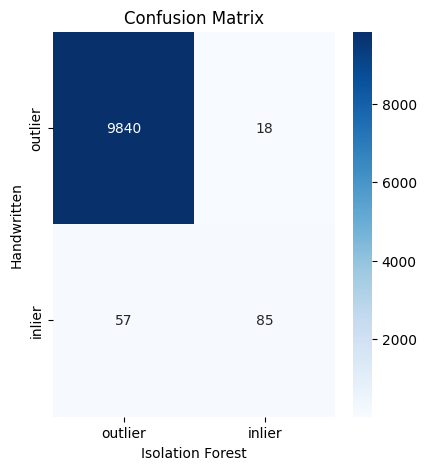

In [68]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [69]:
#Both agree it is inlier
all_inlier = df2[(df2['is_inlier_IF'] == 1) & (df2['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [70]:
#Both agree it is outlier
all_outlier = df2[(df2['is_inlier_IF'] == -1) & (df2['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")